## **Loading and Organizing Data**

In [ ]:
# Loading the dataset into a pandas dataframe
import pandas as pd
df_monthly = pd.read_csv('/content/python_analysis_automobiles_monthly.csv')

# Converting the 'month' column to datetime for time-series analysis
df_monthly['month'] = pd.to_datetime(df_monthly['month'], format='%m/%y')

# Setting the 'month' column as the index
df_monthly.set_index('month', inplace=True)

df_monthly.head()


,cpi_automobile_monthly,unit_sales_monthly,vehicle_loan_interest_monthly,inflation_monthly,eur_try_exchange,monetary_policy_rate,cci,car_buying_probability_next12
month,,,,,,,,
2015-01-01,52500.400,34615.0,0.129,0.072,2.76,7.50,90.0,0.12
2015-02-01,53974.067,55331.0,0.131,0.076,2.81,7.25,89.0,0.12
2015-03-01,54075.667,83302.0,0.126,0.076,2.79,7.25,86.7,0.11
2015-04-01,54074.600,91602.0,0.128,0.079,3.00,7.25,87.5,0.12
2015-05-01,54723.933,81542.0,0.131,0.081,2.92,7.25,86.7,0.12


# **Exploratory Data Analysis**

**Descriptive Statistics**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics
descriptives = df_monthly.describe()
print(descriptives)

       cpi_automobile_monthly  unit_sales_monthly  \
count                88.00000           88.000000   
mean             163050.84800        65115.352273   
std              134662.18083        27422.054123   
min               52500.40000        14373.000000   
25%               71341.15150        47093.750000   
50%              114744.27000        61888.000000   
75%              189910.35500        83075.500000   
max              634350.64100       156173.000000   

       vehicle_loan_interest_monthly  inflation_monthly  eur_try_exchange  \
count                      88.000000          88.000000         88.000000   
mean                        0.186125           0.149364          6.370455   
std                         0.053551           0.110232          3.386958   
min                         0.116000           0.066000          2.760000   
25%                         0.149250           0.088000          3.580000   
50%                         0.162500           0.118000     

***
**Vehicle Bank Loan Rates:** The mean monthly rate is 0.1925 with a standard deviation of 0.04773, indicating variability but not as high as some other variables like inflation. The range is fairly narrow (0.14 to 0.26), suggesting rates are relatively stable month-to-month.

**CPI for Automobiles:** Monthly data shows the CPI varies greatly, with a wide range from a minimum of 55,918 to a maximum of 597,295. The high standard deviation indicates significant fluctuation.

**Unit Sales of Automobiles:** The standard deviation for monthly sales is large, suggesting that the number of units sold each month varies substantially.

**The CCI** with an average score of approximately 84.77, indicates a moderate level of consumer confidence over the sampled period. However, the standard deviation of 6.54 suggests there has been variability in consumer sentiment.

**The car buying probability** variable has a mean of 0.11795, which can be interpreted as a low average likelihood of consumers planning to purchase a car within the next year. This aligns with the observed variability in the CCI: as consumer confidence fluctuates, so does the intention to make significant purchases. The relatively low standard deviation of 0.016620 indicates that this probability has not experienced wide swings during the observed period.
***

**Histograms**

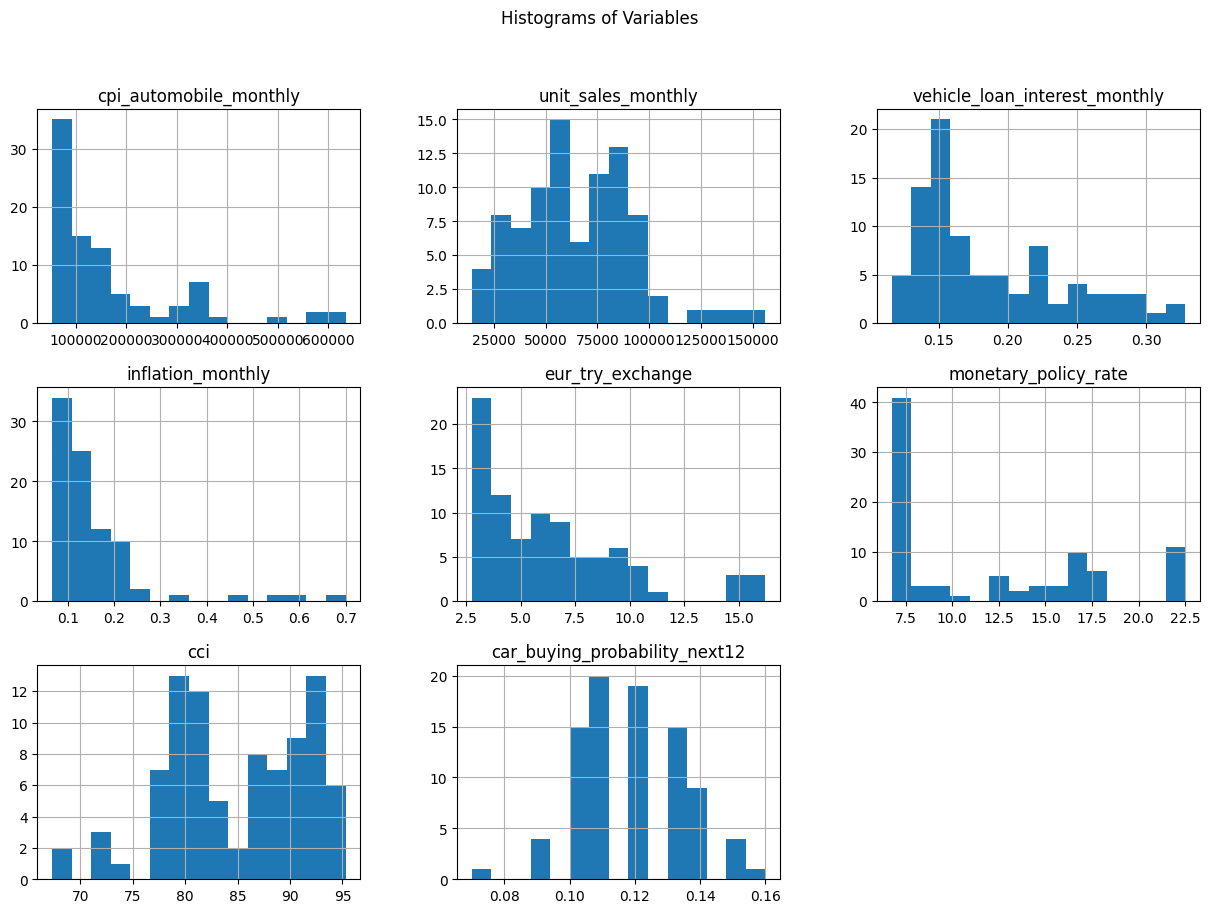

In [ ]:
df_monthly.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Variables')
plt.show()


- The CPI for automobiles shows a right-skewed distribution, with a peak at the lower end, indicating that most months have a lower CPI, with fewer months experiencing very high CPI.
- Unit sales of automobiles also show a right-skewed distribution with more months having sales in the middle range and fewer months with very high or low sales.
- Vehicle loan interest rates are somewhat normally distributed, with most months clustering around the middle rate and fewer at the high and low ends.
- Inflation rates are extremely right-skewed with a few months showing very high inflation, which aligns with potential hyperinflation conditions.
***

**Scatter Plots**

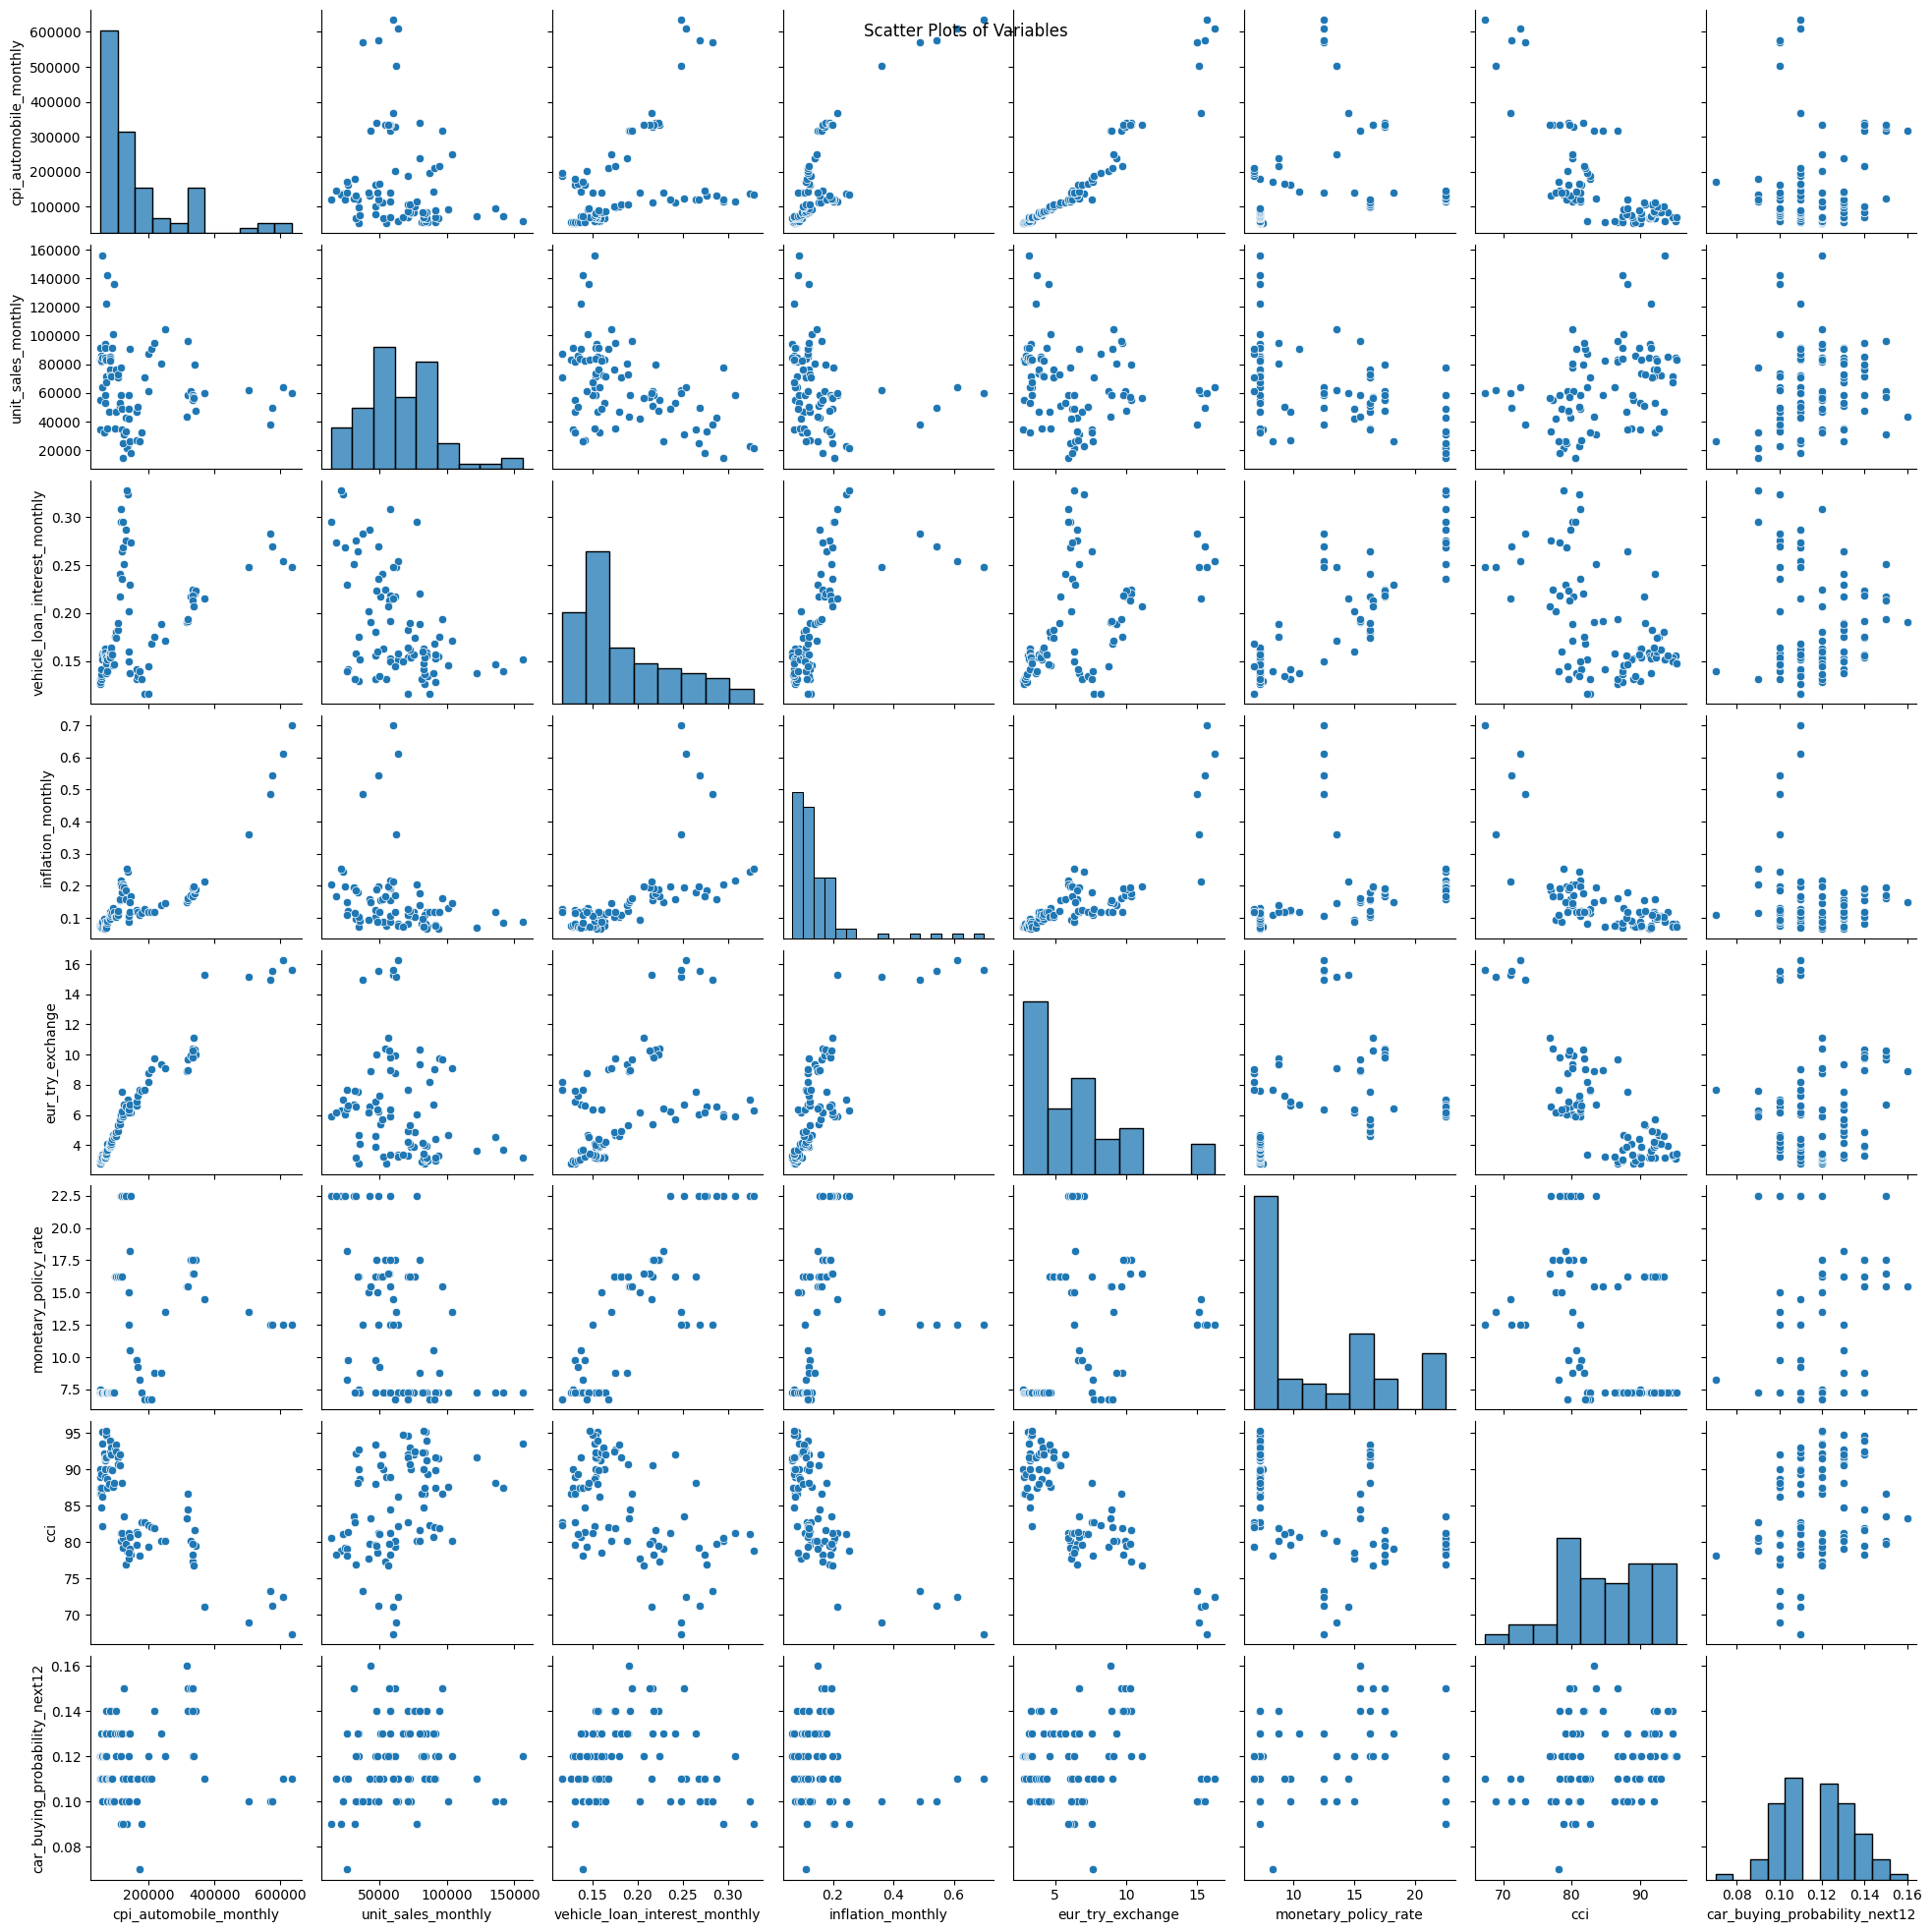

In [ ]:
sns.pairplot(df_monthly)
plt.suptitle('Scatter Plots of Variables')
plt.show()

**Unit Sales Exploration**

- **Distribution:** The histogram for unit sales indicates that the distribution is right-skewed, meaning there are periods with exceptionally high sales compared to a typical month. This could be due to seasonality effects, promotions, or other market stimuli.

- **Relationship with CPI:** There is no clear linear relationship between the CPI for automobiles and unit sales, suggesting that price changes do not straightforwardly predict sales volume changes. This could imply that other factors might moderate the effect of price changes on sales or that the relationship is non-linear.

- **Relationship with Vehicle Loan Interest:** The scatter plot does not show a distinct pattern or correlation between vehicle loan interest rates and unit sales, indicating that the interest rate fluctuations might not directly influence the sales in a simple linear manner.

- **Scatter with Other Variables:** There's no immediately observable pattern in the scatter plots between unit sales and variables like exchange rates or the Consumer Confidence Index (CCI). This complexity suggests that these economic factors have a nuanced impact on unit sales that may not be captured through simple bivariate analysis.
***

**Box Plots**

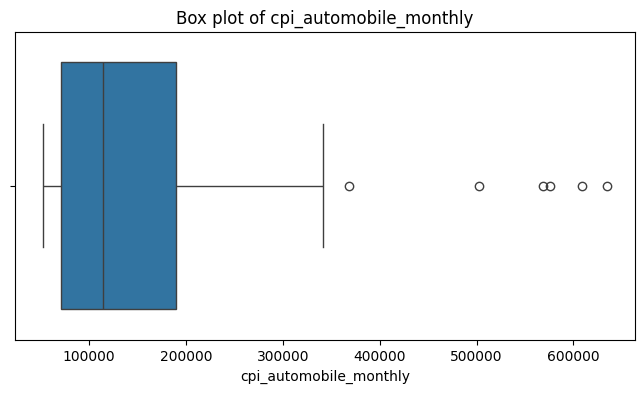

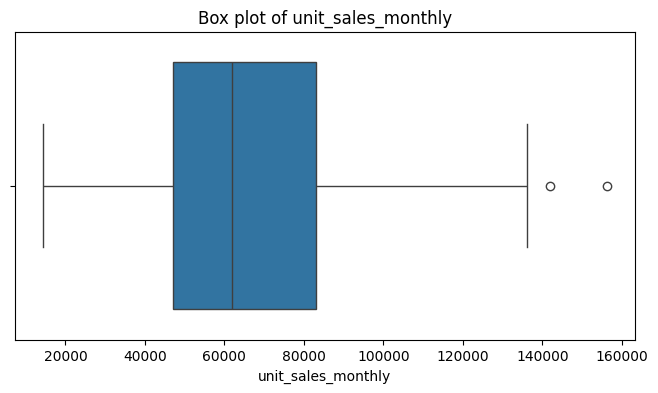

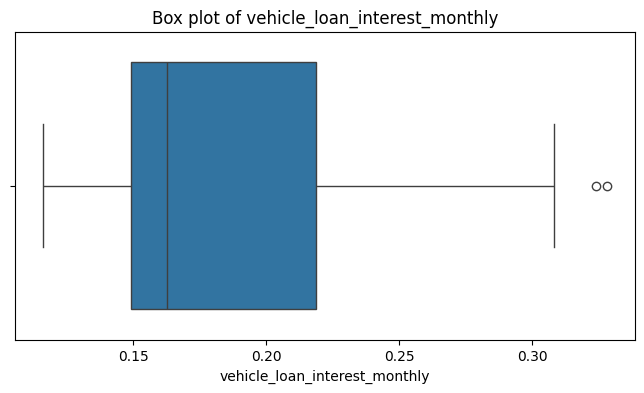

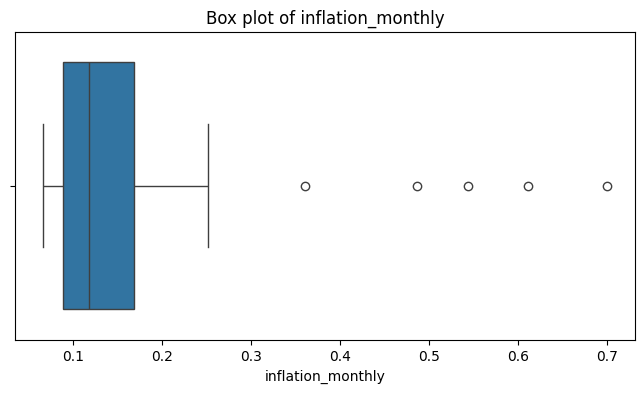

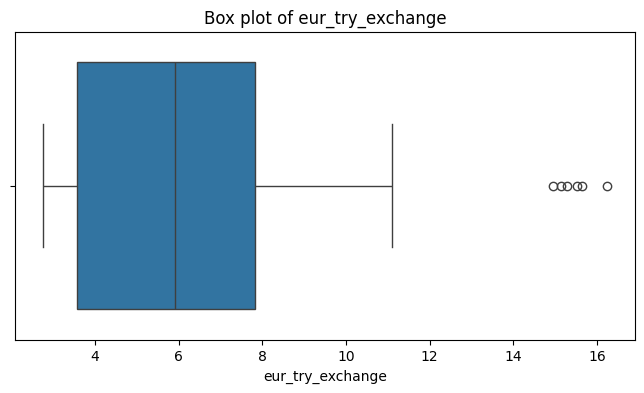

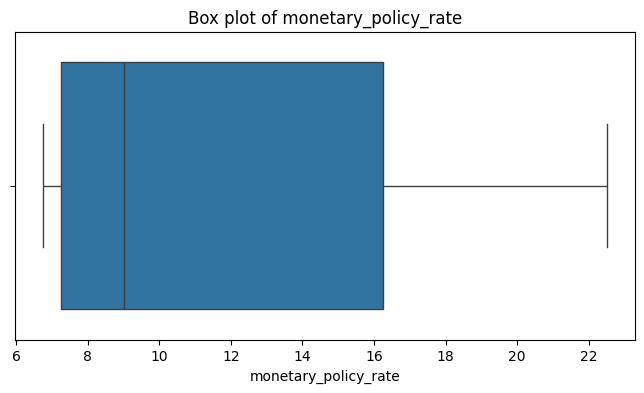

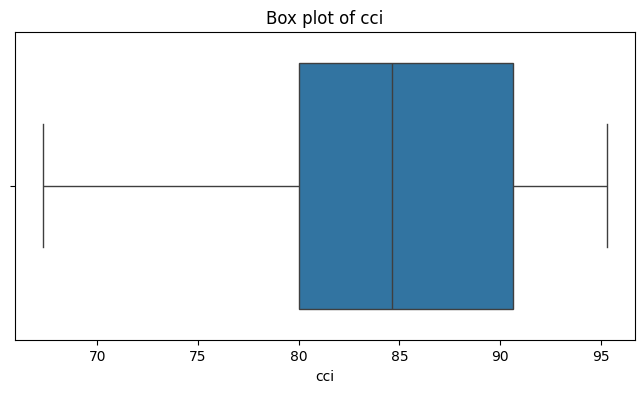

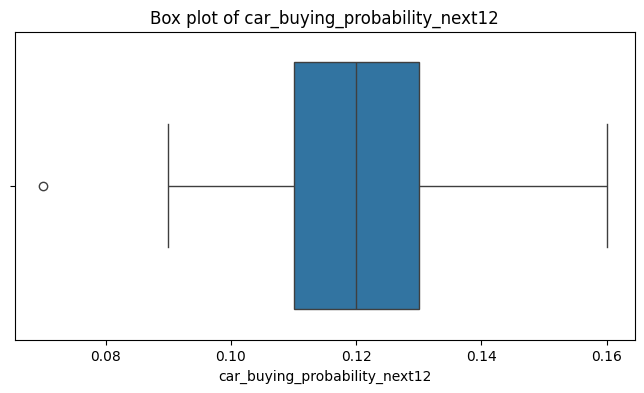

In [ ]:
for column in df_monthly.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_monthly, x=column)
    plt.title(f'Box plot of {column}')
    plt.show()

**Inflation Rate:**
- The median inflation rate is around 20%, with a relatively symmetrical box indicating that the middle 50% of the data is evenly distributed around the median.
- There are multiple outliers on the higher end, suggesting occasional months with significantly higher than average inflation rates. These could be periods of economic instability or shocks.

**Vehicle Loan Interest Rates:**
- The median interest rate is just above 20% if a percentage. The box plot shows a relatively even distribution with a few outliers on the higher end.
- The interquartile range (IQR) is relatively tight, which indicates that most of the data points are within a small range of interest rates, suggesting stability in the vehicle loan market.

**Unit Sales of Automobiles:**
- The median unit sales figure is between 60,000 and 80,000 units per month. The distribution is slightly right-skewed, with a few outliers that represent months with exceptionally high sales.
- The spread of the data is quite large, indicating variability in the monthly automobile sales, which could be influenced by seasonal factors, economic conditions, or promotional activities.

**CPI for Automobiles:**
- The median CPI is around 200,000, with a right-skewed distribution and several outliers indicating months where the CPI was significantly higher than usual.
- This skewness suggests that while most of the time CPI values are clustered around a certain level, there are periods where prices increase quite a bit, which could impact consumer buying power.
***

In [ ]:
outliers_dict = {}  # Dictionary to store outliers for each column

for column in df_monthly.columns:
    # Calculate IQR
    Q1 = df_monthly[column].quantile(0.25)
    Q3 = df_monthly[column].quantile(0.75)
    IQR = Q3 - Q1

    # Find outliers
    outliers = df_monthly[(df_monthly[column] < (Q1 - 1.5 * IQR)) | (df_monthly[column] > (Q3 + 1.5 * IQR))]

    # Add outliers to the dictionary
    outliers_dict[column] = outliers.index.tolist()

# Display outliers for each column with index set as month
for column, outliers in outliers_dict.items():
    print(f'Outliers for {column}: {outliers}')


Outliers for cpi_automobile_monthly: [Timestamp('2021-11-01 00:00:00'), Timestamp('2021-12-01 00:00:00'), Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-04-01 00:00:00')]
Outliers for unit_sales_monthly: [Timestamp('2015-12-01 00:00:00'), Timestamp('2016-12-01 00:00:00')]
Outliers for vehicle_loan_interest_monthly: [Timestamp('2018-09-01 00:00:00'), Timestamp('2018-10-01 00:00:00')]
Outliers for inflation_monthly: [Timestamp('2021-12-01 00:00:00'), Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-04-01 00:00:00')]
Outliers for eur_try_exchange: [Timestamp('2021-11-01 00:00:00'), Timestamp('2021-12-01 00:00:00'), Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-04-01 00:00:00')]
Outliers for monetary_policy_rate: []
Outliers for cci: []
Outliers for car_buying_probability_next12: [

**Outliers for cpi_automobile_monthly:**

- November 2021
- December 2021
- January 2022
- February 2022
- March 2022
- April 2022

**Outliers for unit_sales_monthly:**
- December 2015
- December 2016

**Outliers for vehicle_loan_interest_monthly:**
- September 2018
- October 2018

**Outliers for inflation_monthly:**
- December 2021
- January 2022
- February 2022
- March 2022
- April 2022

**Outliers for eur_try_exchange:**

- November 2021
- December 2021
- January 2022
- February 2022
- March 2022
- April 2022

**Outliers for car_buying_probability_next12:**
- April 2020

**Outliers for monetary_policy_rate: None**

**Outliers for cci: None**

***


**Correlation Matrix and Heatmap**

                               cpi_automobile_monthly  unit_sales_monthly  \
cpi_automobile_monthly                       1.000000           -0.300518   
unit_sales_monthly                          -0.300518            1.000000   
vehicle_loan_interest_monthly                0.524257           -0.439885   
inflation_monthly                            0.809343           -0.414977   
eur_try_exchange                             0.988847           -0.300659   
monetary_policy_rate                         0.522308           -0.566468   
cci                                         -0.735138            0.403794   
car_buying_probability_next12                0.026244            0.184602   

                               vehicle_loan_interest_monthly  \
cpi_automobile_monthly                              0.524257   
unit_sales_monthly                                 -0.439885   
vehicle_loan_interest_monthly                       1.000000   
inflation_monthly                                 

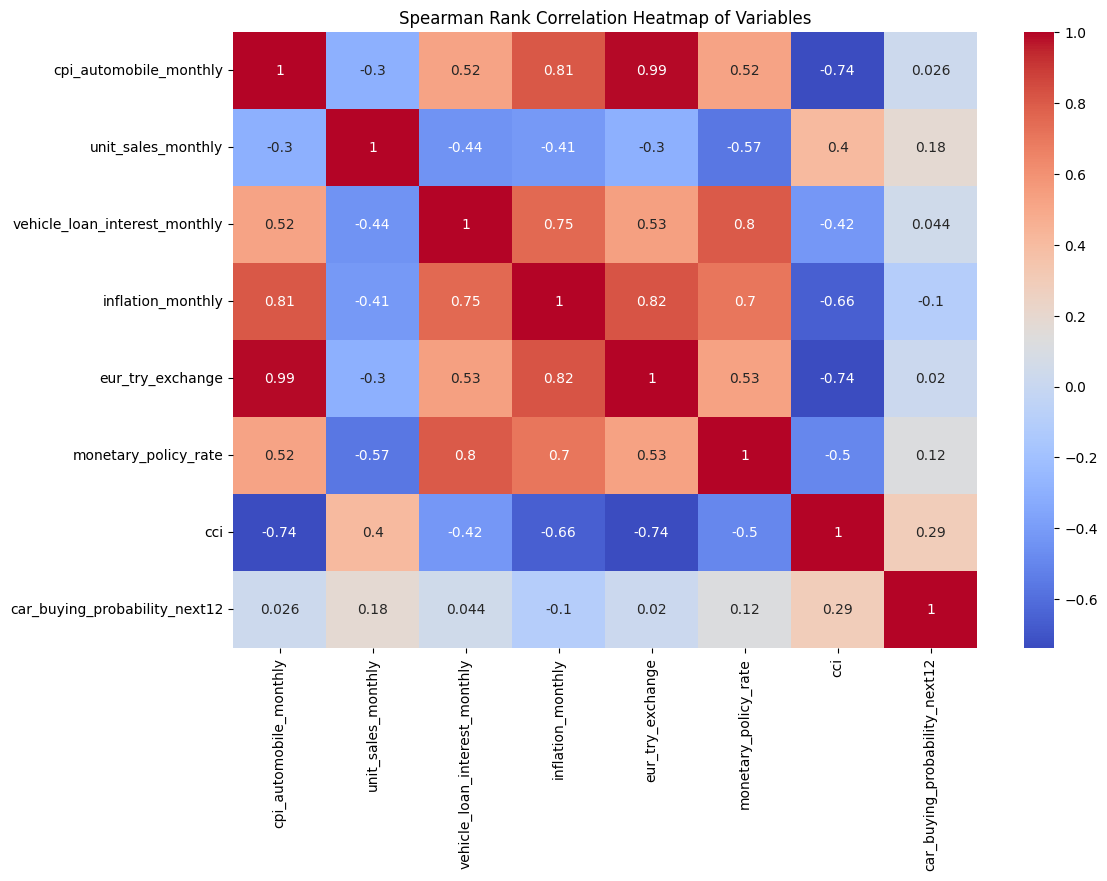

In [ ]:
# Calculating Spearman's rank correlation for the DataFrame
spearman_correlation_matrix = df_monthly.corr(method='spearman')
print(spearman_correlation_matrix)

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Rank Correlation Heatmap of Variables')
plt.show()

The variable **unit_sales_monthly** is slightly negatively correlated with **cpi_automobile_monthly** (-0.3), suggesting that as the CPI for automobiles increases, unit sales tend to decrease, although this relationship is not very strong.

**unit_sales_monthly** also has a moderate negative correlation with **vehicle_loan_interest_monthly** (-0.44) and **inflation_monthly** (-0.41), implying that higher loan interest rates and inflation may be associated with lower unit sales.

The variable **unit_sales_monthly** shows a positive correlation with **cci** (0.4), which could indicate that higher consumer confidence is associated with increased unit sales.

Notably, **cpi_automobile_monthly** shows a very strong positive correlation with eur_try_exchange (0.99), indicating the link between exchange rates and automobile prices, which is expected since it's imported goods.. cpi_automobile_monthly has a significant correlation with inflation_monthly (0.81), which is expected as the inflation is calculated by total year on year monthly CPI changes.
***

**Line plot**

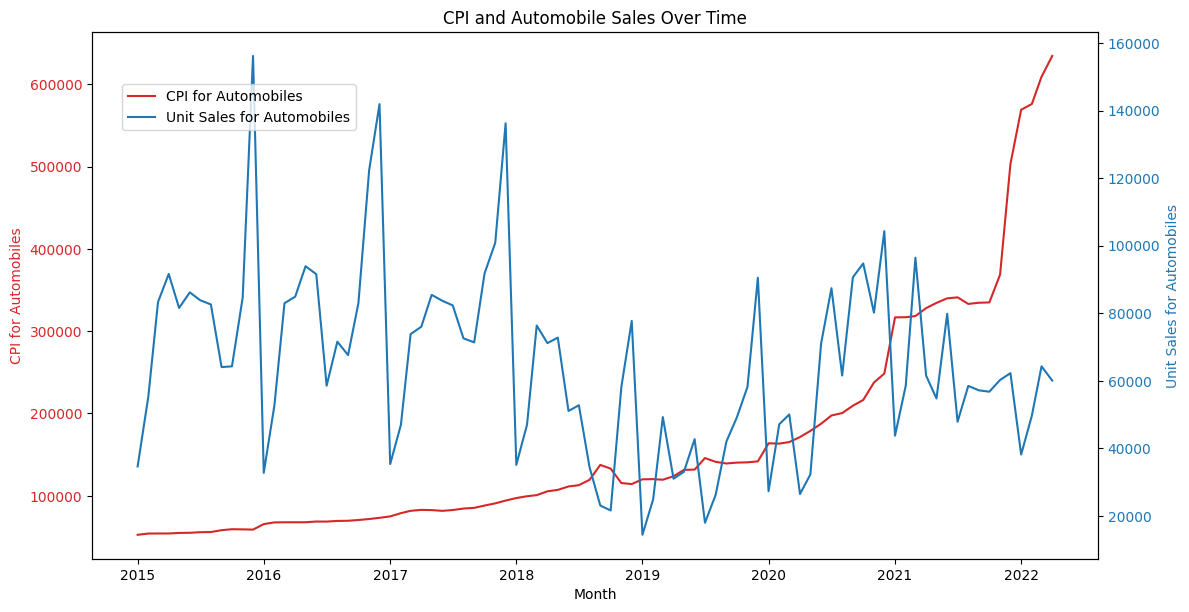

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('CPI for Automobiles', color=color)
ax1.plot(df_monthly.index, df_monthly['cpi_automobile_monthly'], color=color, label='CPI for Automobiles')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a twin Axes sharing the x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Unit Sales for Automobiles', color=color)
ax2.plot(df_monthly.index, df_monthly['unit_sales_monthly'], color=color, label='Unit Sales for Automobiles')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Just to ensure there's no clipping of the ylabel
plt.title('CPI and Automobile Sales Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()

#I set up a chart to display two types of information side by side, using different y-axes because they have different scales.
#I plotted the Consumer Price Index (CPI) for automobiles on the left side of the chart, making it red. This shows how the costs of automobiles have changed over time.
#Then I added the unit sales of automobiles on the right side, coloring it blue. This shows the number of automobiles sold over the same timeline.
#I made sure both the CPI and sales data were clearly labeled so it's easy to understand what each line represents. I also labeled the timeline along the bottom of the chart to show the period covered by the data.
#To avoid any confusion between the two types of information, I used different colors for each and placed their labels on corresponding sides of the chart. This way, anyone looking at the chart can easily differentiate between the cost changes and sales numbers.


I tracked two key metrics over time: the CPI for automobiles (in red) and unit sales for automobiles (in blue).

The red line, representing the CPI, shows a general upward trend, particularly a sharp increase around 2021-2022.

The blue line, showing automobile sales, fluctuates quite a bit from month to month but doesn’t show a consistent trend like the CPI does.

This visualization helps me see how the prices and sales have changed over the years and hints at an indirect relationship between them.

In [ ]:
print(df_monthly.head())


            cpi_automobile_monthly  unit_sales_monthly  \
month                                                    
2015-01-01               52500.400             34615.0   
2015-02-01               53974.067             55331.0   
2015-03-01               54075.667             83302.0   
2015-04-01               54074.600             91602.0   
2015-05-01               54723.933             81542.0   

            vehicle_loan_interest_monthly  inflation_monthly  \
month                                                          
2015-01-01                          0.129              0.072   
2015-02-01                          0.131              0.076   
2015-03-01                          0.126              0.076   
2015-04-01                          0.128              0.079   
2015-05-01                          0.131              0.081   

            eur_try_exchange  monetary_policy_rate   cci  \
month                                                      
2015-01-01              

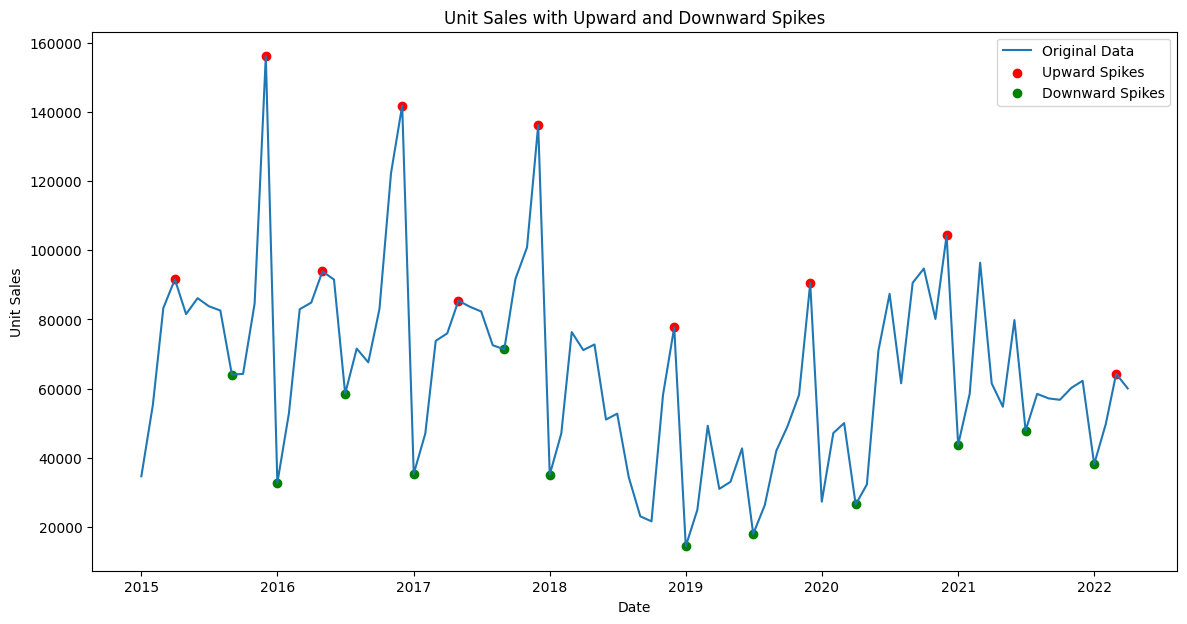

Dates of upward spikes:
DatetimeIndex(['2015-04-01', '2015-12-01', '2016-05-01', '2016-12-01',
               '2017-05-01', '2017-12-01', '2018-12-01', '2019-12-01',
               '2020-12-01', '2022-03-01'],
              dtype='datetime64[ns]', name='month', freq=None)
Dates of downward spikes:
DatetimeIndex(['2015-09-01', '2016-01-01', '2016-07-01', '2017-01-01',
               '2017-09-01', '2018-01-01', '2019-01-01', '2019-07-01',
               '2020-04-01', '2021-01-01', '2021-07-01', '2022-01-01'],
              dtype='datetime64[ns]', name='month', freq=None)


In [ ]:
from scipy.signal import argrelextrema

# Finding upward peaks
upward_indices = argrelextrema(df_monthly['unit_sales_monthly'].values, comparator=lambda x, y: x > y, order=3)[0]

# Now inverting the data to find downward peaks
inverted_data = -df_monthly['unit_sales_monthly']
downward_indices = argrelextrema(inverted_data.values, comparator=lambda x, y: x > y, order=3)[0]

# Plot of the original data
plt.figure(figsize=(14, 7))
plt.plot(df_monthly.index, df_monthly['unit_sales_monthly'], label='Original Data')

# Marking spikes
plt.scatter(df_monthly.index[upward_indices], df_monthly['unit_sales_monthly'].iloc[upward_indices], color='r', label='Upward Spikes')
plt.scatter(df_monthly.index[downward_indices], df_monthly['unit_sales_monthly'].iloc[downward_indices], color='g', label='Downward Spikes')

plt.title('Unit Sales with Upward and Downward Spikes')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend()
plt.show()

# Printing the dates of spikes
print("Dates of upward spikes:")
print(df_monthly.index[upward_indices])

print("Dates of downward spikes:")
print(df_monthly.index[downward_indices])




**Upward spikes:**
April 2015
December 2015
May 2016
December 2016
May 2017
December 2017
December 2018
December 2019
December 2020
March 2022

**Downward spikes:**
September 2015
January 2016
July 2016
January 2017
September 2017
January 2018
January 2019
July 2019
April 2020
January 2021
July 2021
January 2022

Upward sales spikes were consistently observed in April and December across several years, potentially linked to holiday seasons and promotional events.
Downward sales trends were notably recurring in January, possibly due to post-holiday spending slowdowns.

Additional sales declines were spotted in varying months like July, September, and January, hinting at seasonal sales cycles or economic influences.
Economic indicators and market trends should be cross-referenced with these spikes for a deeper understanding of consumer behavior dynamics.

April 2020: Coincides with a car buying probability outlier in April 2020, which could indicate a decrease in consumer intent to purchase vehicles.


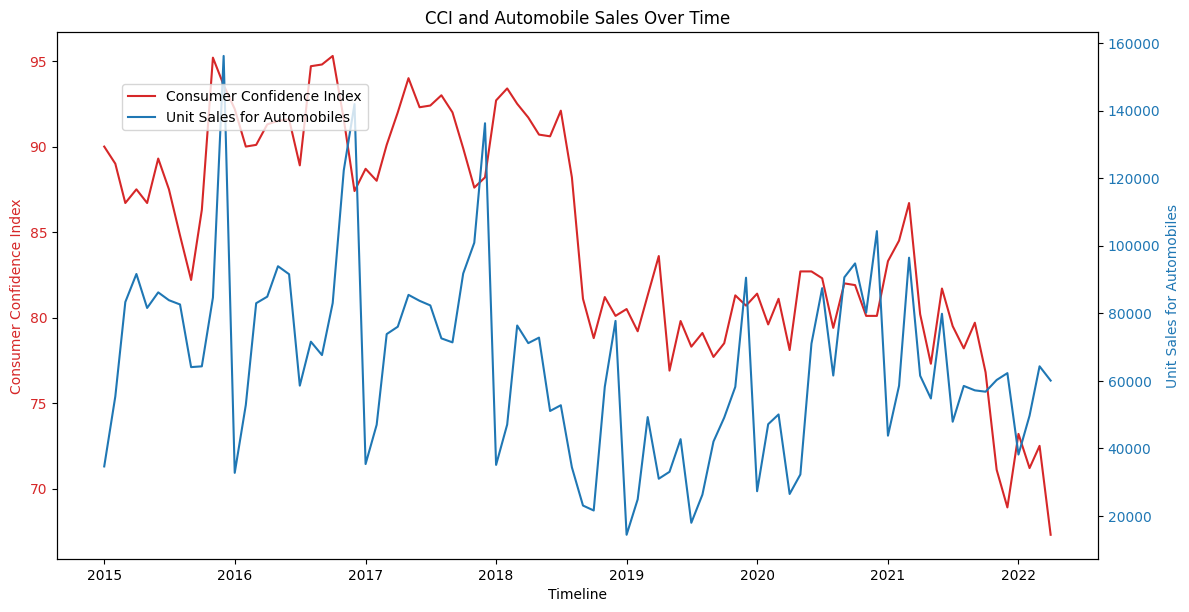

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Timeline')
ax1.set_ylabel('Consumer Confidence Index', color=color)
ax1.plot(df_monthly.index, df_monthly['cci'], color=color, label='Consumer Confidence Index')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a twin Axes sharing the x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Unit Sales for Automobiles', color=color)
ax2.plot(df_monthly.index, df_monthly['unit_sales_monthly'], color=color, label='Unit Sales for Automobiles')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure there's no clipping of the ylabel
plt.title('CCI and Automobile Sales Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()



**Adding time-dummies pre-post November 2021**

In [ ]:
#To address the effect of economic distress, adding time-dummies pre-post November 2021
df_monthly['post_nov_2021'] = (df_monthly.index > '2021-11-01').astype(int)


Descriptive Statistics for pre-post Nov. 2021

In [ ]:
# Filtering DataFrame for the period before Nov 2021
pre_nov_2021_df = df_monthly[df_monthly.index < '2021-11-01']

# Descriptive statistics for this period
pre_nov_2021_stats = pre_nov_2021_df.describe()

# Filtering DataFrame for the period starting Nov 2021
post_nov_2021_df = df_monthly[df_monthly.index >= '2021-11-01']

# Descriptive statistics for this period
post_nov_2021_stats = post_nov_2021_df.describe()

print("Pre-November 2021 Descriptive Statistics:")
print(pre_nov_2021_stats)
print("\nPost-November 2021 Descriptive Statistics:")
print(post_nov_2021_stats)


Pre-November 2021 Descriptive Statistics:
       cpi_automobile_monthly  unit_sales_monthly  \
count               82.000000           82.000000   
mean            135226.141366        65800.085366   
std              86068.149093        28187.381558   
min              52500.400000        14373.000000   
25%              69762.463000        47037.250000   
50%             109140.484000        64140.000000   
75%             163546.790500        83569.000000   
max             341005.656000       156173.000000   

       vehicle_loan_interest_monthly  inflation_monthly  eur_try_exchange  \
count                      82.000000          82.000000         82.000000   
mean                        0.181244           0.124732          5.705366   
std                         0.051900           0.046148          2.395983   
min                         0.116000           0.066000          2.760000   
25%                         0.146250           0.086500          3.385000   
50%               

In [ ]:
# Calculate Spearman's rank correlation for the period before November 2021
pre_nov_2021_corr = df_monthly[df_monthly['post_nov_2021'] == 0].corr(method='spearman')['unit_sales_monthly']

# Calculate Spearman's rank correlation for the period post November 2021
post_nov_2021_corr = df_monthly[df_monthly['post_nov_2021'] == 1].corr(method='spearman')['unit_sales_monthly']

# Display the correlations
print("Spearman's rank correlation pre-November 2021:")
print(pre_nov_2021_corr)
print("\nSpearman's rank correlation post-November 2021:")
print(post_nov_2021_corr)


Spearman's rank correlation pre-November 2021:
cpi_automobile_monthly          -0.290584
unit_sales_monthly               1.000000
vehicle_loan_interest_monthly   -0.426994
inflation_monthly               -0.417841
eur_try_exchange                -0.291655
monetary_policy_rate            -0.568721
cci                              0.402979
car_buying_probability_next12    0.156791
post_nov_2021                         NaN
Name: unit_sales_monthly, dtype: float64

Spearman's rank correlation post-November 2021:
cpi_automobile_monthly           0.200000
unit_sales_monthly               1.000000
vehicle_loan_interest_monthly   -0.666886
inflation_monthly                0.200000
eur_try_exchange                 0.700000
monetary_policy_rate             0.353553
cci                             -0.300000
car_buying_probability_next12    0.577350
post_nov_2021                         NaN
Name: unit_sales_monthly, dtype: float64


**Pre-November 2021:**
CPI for automobiles and unit sales were moderately negatively correlated (-0.29), suggesting that higher automobile prices were somewhat associated with lower car sales.
Vehicle loan interest rates had a stronger negative correlation with unit sales (-0.43), indicating that as loan rates increased, car sales decreased.
The Consumer Confidence Index (CCI) had a positive correlation with unit sales (0.40), which means that higher consumer confidence levels were aligned with increased car sales.

**Post-November 2021:**
The correlation between CPI for automobiles and unit sales became positive (0.20), a notable shift from the pre-November 2021 period. This could suggest that after November 2021, the influence of car prices on sales dynamics changed, potentially due to changes in consumer behavior or market conditions.
The negative correlation with vehicle loan interest rates intensified (-0.67), indicating a stronger inverse relationship between loan rates and car sales, suggesting that car sales were more sensitive to loan rates after November 2021.
The correlation with the CCI reversed to a slight negative (-0.30), showing that consumer confidence had less influence on unit sales, which could imply a shift in consumer sentiment or its impact on purchasing decisions.

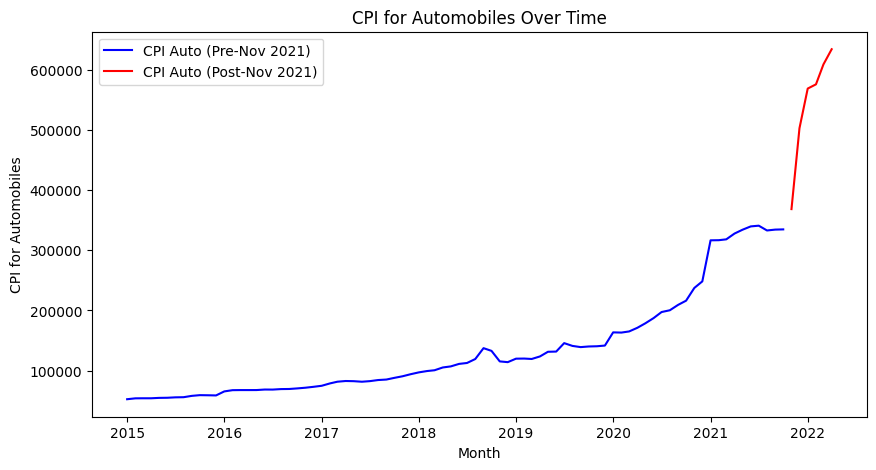

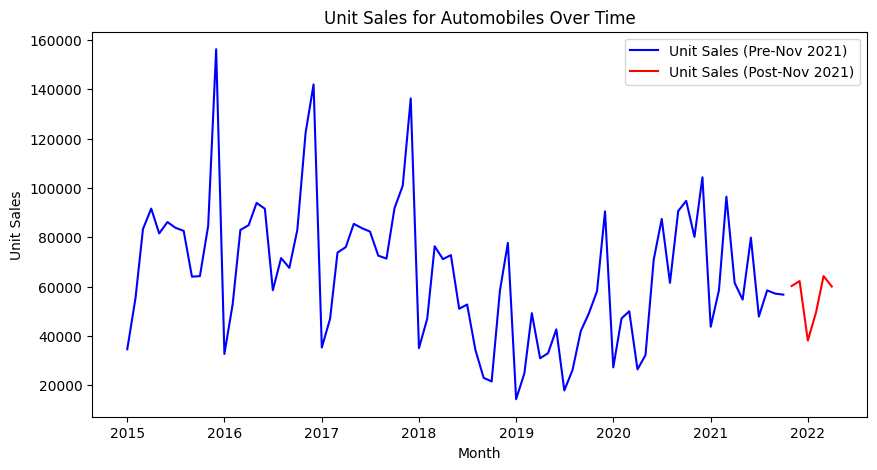

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate the data into two parts, pre and post November 2021
pre_nov_2021 = df_monthly[df_monthly.index < pd.Timestamp('2021-11-01')]
post_nov_2021 = df_monthly[df_monthly.index >= pd.Timestamp('2021-11-01')]

# Create line plots for CPI for Automobiles
plt.figure(figsize=(10, 5))

# Plotting pre-November 2021 CPI data in blue
plt.plot(pre_nov_2021.index, pre_nov_2021['cpi_automobile_monthly'], color='blue', label='CPI Auto (Pre-Nov 2021)')

# Plotting post-November 2021 CPI data in red
plt.plot(post_nov_2021.index, post_nov_2021['cpi_automobile_monthly'], color='red', label='CPI Auto (Post-Nov 2021)')

plt.title('CPI for Automobiles Over Time')
plt.xlabel('Month')
plt.ylabel('CPI for Automobiles')
plt.legend()
plt.show()

# Create line plots for Unit Sales for Automobiles
plt.figure(figsize=(10, 5))

# Plotting pre-November 2021 sales data in blue
plt.plot(pre_nov_2021.index, pre_nov_2021['unit_sales_monthly'], color='blue', label='Unit Sales (Pre-Nov 2021)')

# Plotting post-November 2021 sales data in red
plt.plot(post_nov_2021.index, post_nov_2021['unit_sales_monthly'], color='red', label='Unit Sales (Post-Nov 2021)')

plt.title('Unit Sales for Automobiles Over Time')
plt.xlabel('Month')
plt.ylabel('Unit Sales')
plt.legend()
plt.show()


# **Time-Series**

**Seasonal-Trend decomposition**

---



Using **LOESS (STL)** is a method used to decompose a time series into three components:

- **Seasonal Component:** This captures the repeating patterns or seasonal fluctuations in the data.
- **Trend Component:** This represents the long-term trend or overall direction of the data.
- **Residual Component:** This contains the random fluctuations or noise that cannot be explained by the seasonal and trend components.

LOESS: locally estimated scatterplot smoothing

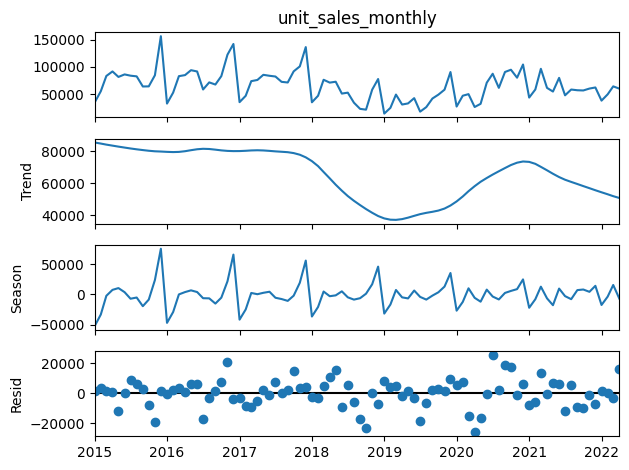

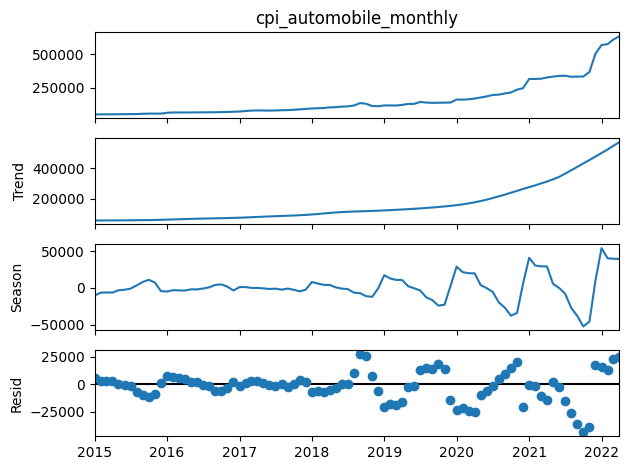

In [ ]:
from statsmodels.tsa.seasonal import STL

# Determining IV and DV
iv_series = df_monthly['cpi_automobile_monthly']
dv_series = df_monthly['unit_sales_monthly']

# Perform STL decomposition
stl_decomposition_dv = STL(dv_series, seasonal=13).fit()
#Using an odd number, such as 13, for the seasonal parameter ensures that the window used to estimate seasonal patterns is centered around each data point, facilitating better capture of seasonal fluctuations.

stl_decomposition_iv = STL(iv_series, seasonal=13).fit()

# Plot the decomposition
stl_decomposition_dv.plot()
stl_decomposition_iv.plot()
plt.show()


In [ ]:
from scipy.stats.mstats import winsorize

# Assuming 'unit_sales_monthly' is your data column and you want to winsorize the top 10% values
df_monthly['unit_sales_monthly_winsorized'] = winsorize(df_monthly['unit_sales_monthly'], limits=[0, 0.05])
df_monthly['cpi_automobile_monthly_winsorized'] = winsorize(df_monthly['cpi_automobile_monthly'], limits=[0, 0.05])


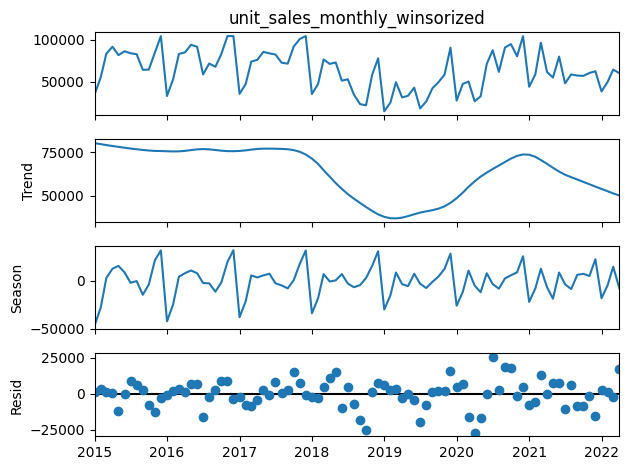

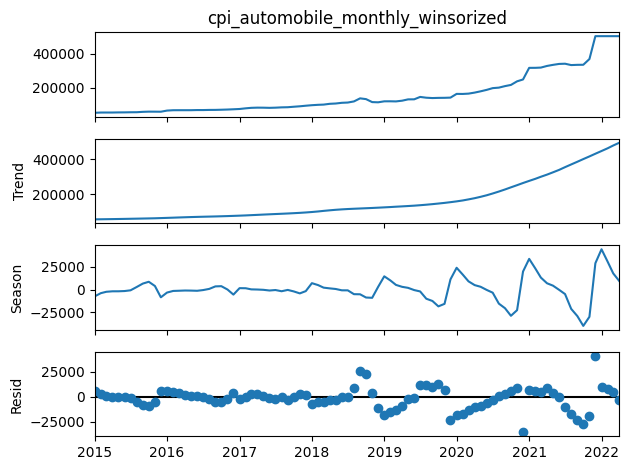

In [ ]:
bufrom statsmodels.tsa.seasonal import STL

# Determining IV and DV
dv_series_w = df_monthly['unit_sales_monthly_winsorized']
iv_series_w = df_monthly['cpi_automobile_monthly_winsorized']

stl_decomposition_dv_w = STL(dv_series_w, seasonal=13).fit()
stl_decomposition_iv_w = STL(iv_series_w, seasonal=13).fit()

stl_decomposition_dv_w.plot()
stl_decomposition_iv_w.plot()
plt.show()


## **Regression Analysis**



> Although our data shows high seasonality with several outliers and also possible multicollinearity issues, just to see how the outlook is we run an OLS regression.



In [ ]:
import statsmodels.api as sm

# Defining the dependent and independent variables
X = df_monthly[['cpi_automobile_monthly', 'vehicle_loan_interest_monthly',
               'inflation_monthly','eur_try_exchange', 'cci', 'monetary_policy_rate',
               'car_buying_probability_next12', 'post_nov_2021']]
Y = df_monthly['unit_sales_monthly']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Constructing and fitting the OLS regression model
model = sm.OLS(Y, X).fit()

# Printing the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     unit_sales_monthly   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     4.877
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           6.53e-05
Time:                        11:23:29   Log-Likelihood:                -1006.0
No. Observations:                  88   AIC:                             2030.
Df Residuals:                      79   BIC:                             2052.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Let's also remove the effect of after 2021 by looking at the previous data.**

In [ ]:
# Selecting only the rows for the period before November 2021 to remove the outlier effect from IVs.
pre_nov_2021_df = df_monthly[df_monthly['post_nov_2021'] == 0]

#DVs and IVs
X = pre_nov_2021_df[['cpi_automobile_monthly', 'vehicle_loan_interest_monthly',
       'inflation_monthly', 'eur_try_exchange', 'monetary_policy_rate',
       'cci', 'car_buying_probability_next12']]
y = pre_nov_2021_df['unit_sales_monthly']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# View the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     unit_sales_monthly   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     5.273
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           6.28e-05
Time:                        11:23:29   Log-Likelihood:                -950.64
No. Observations:                  83   AIC:                             1917.
Df Residuals:                      75   BIC:                             1937.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         



> **Obviously, the data has too many issues to run an OLS. Linearity and Homoscedasticity being the main problems.**



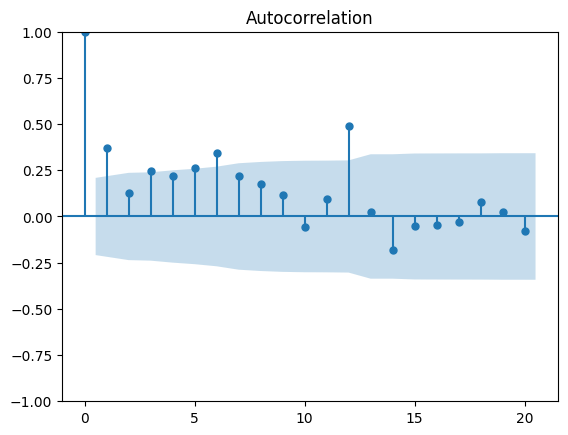

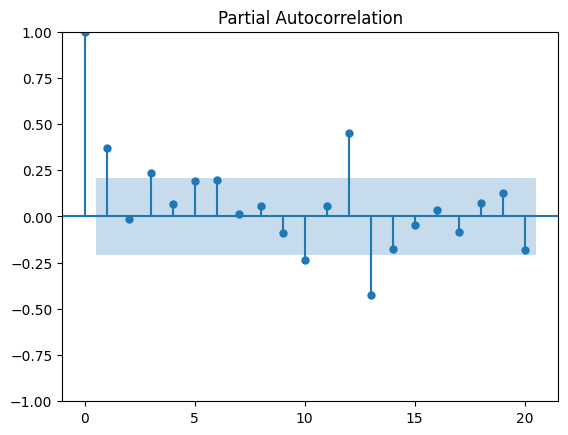

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(df_monthly['unit_sales_monthly'].dropna(), lags=20)
plt.show()

# PACF plot
plot_pacf(df_monthly['unit_sales_monthly'].dropna(), lags=20)
plt.show()
